In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Questions to Investigate:

### 3. Age and Gender:

**A) Which age group has the highest number of bikers?**

**B) What is the average biking distence for the gender groups?**

**B) Bike pattern of diffrent gender groups across various times of the day?**


### 4. Busiest Station

**A) Top 05 beginning desitinaiton in terms of number**

**B) Top 05 end desitinaition in terms of number**


### 5. People Covering the largest distence

**A) Show relationship between gender, age and covered distence**

**B) Show relationship between customer type, and covered distence**



In [2]:
%store -r df
%store -r df_time
%store -r df_customer
%store -r df_subscriber

In [3]:
df.shape

(1001173, 26)

### Age

In [4]:
#Finding the minimum and the maximum of age
df['age'].min(), df['age'].max() 

(18, 131)

### Some of the ages are clearly wrong. Hence, we limit our analysis on the portion of the population with that falls  within the significant category.

In [5]:
# median age of the population 
df['age'].median()

34.0

In [6]:
df.describe().age

count    1.001173e+06
mean     3.636219e+01
std      1.050332e+01
min      1.800000e+01
25%      2.900000e+01
50%      3.400000e+01
75%      4.200000e+01
max      1.310000e+02
Name: age, dtype: float64

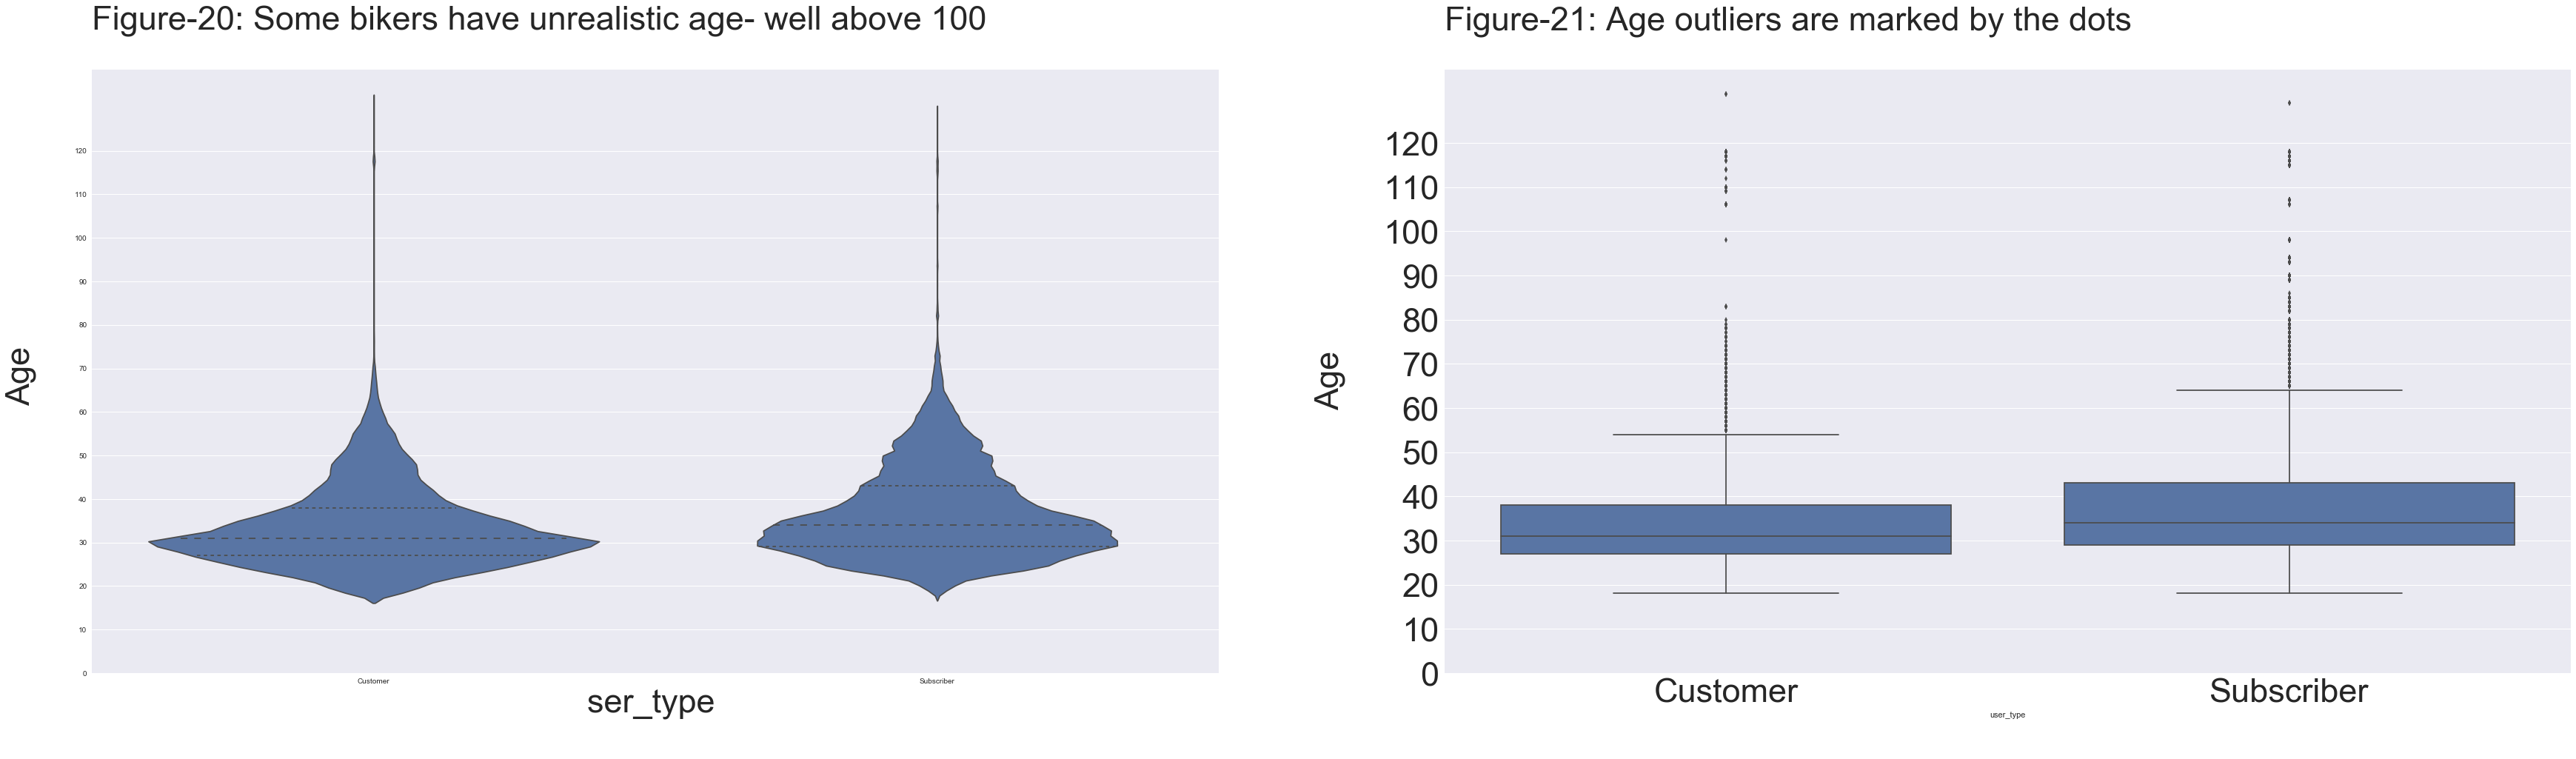

In [79]:
plt.figure(figsize = [60, 15])
base_color = sns.color_palette()[0]
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
# left plot: violin plot
sns.violinplot(data = df, x = 'user_type', y = 'age', color = base_color, inner = 'quartile')
plt.title('Figure-20: Some bikers have unrealistic age- well above 100\n',fontsize=45,loc="left")
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)
plt.ylabel("Age \n",fontsize=45)
plt.yticks(np.arange(0, 130, 10))
plt.xlabel("ser_type \n",fontsize=45)
sns.despine(bottom=True, left=True)


plt.subplot(1, 2, 2)
# left plot: violin plot
sns.boxplot(data = df, x = 'user_type', y = 'age', color = base_color)
plt.title('Figure-21: Age outliers are marked by the dots \n',fontsize=45,loc="left")
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)
plt.yticks(np.arange(0, 130, 10))
plt.ylabel("Age  \n",fontsize=45)
sns.despine(bottom=True, left=True)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


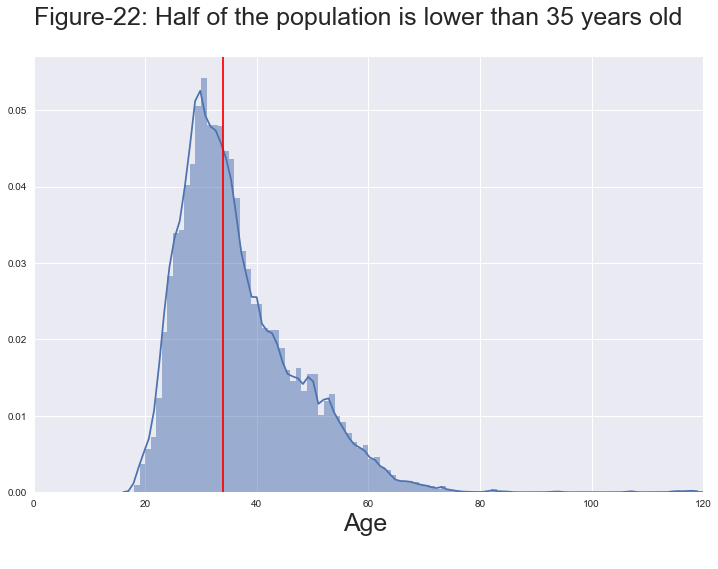

In [90]:
plt.figure(figsize = [12, 8])
sns.set(style="darkgrid")
bin_edges = np.arange(0, df['age'].max()+1, 1)
sns.distplot(df['age'], bins = bin_edges, kde = True,
            hist_kws = {'alpha' : 0.5})
plt.axvline(df.age.median(), c = 'red')
plt.title('Figure-22: Half of the population is lower than 35 years old \n',fontsize=25,loc="left")
plt.xlabel("Age \n",fontsize=25)
plt.xlim(0, 120)
plt.rc('xtick',labelsize=35)
plt.rc('ytick',labelsize=35)
sns.despine(bottom=True, left=True)

In [9]:
# Calculaitng 99% percentile
ninetynine_percentile_age = np.percentile(df.age, 97)
ninetynine_percentile_age

59.0

**Note: We can see that 97% of the people are 59 years or younger. Hence, we exclude the population with age higher than 59 years from our analysis for convenience.**

In [10]:
df_under61= df.query('age < 60')
df_under61.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144


In [11]:
# Creates bin edges for runtime- this will exclude the 31 movies with 0 runtime as the bin edge starts at 0
bin_edges = [17, 19, 29, 39, 49, 60]
# Creates bin names based on the runtime
bin_names = ['Teenagers (18-19 yrs)','Twenties (20-29 yrs)','Thirties (30-39 yrs)', 'Forties (40-49 yrs)', 'Fifties (50-59 yrs)']

In [12]:
# Creates decade_levels column based on the year of release
df_under61['age_cat'] = pd.cut(df_under61['age'], bin_edges, labels = bin_names)
df_under61.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,age_cat
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876,Thirties (30-39 yrs)
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144,Fifties (50-59 yrs)
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772,Twenties (20-29 yrs)
28,871,2017-12-31 23:37:47.192,2017-12-31 23:52:18.473,323,Broadway at Kearny,37.798014,-122.405950,14,Clay St at Battery St,37.795001,...,2017,12,23,23,14.516667,Weekend,38,Winter,0.623898,Thirties (30-39 yrs)
32,733,2017-12-31 23:38:38.861,2017-12-31 23:50:52.504,323,Broadway at Kearny,37.798014,-122.405950,14,Clay St at Battery St,37.795001,...,2017,12,23,23,12.216667,Weekend,37,Winter,0.623898,Thirties (30-39 yrs)


In [13]:
df_under61 = df_under61.drop(['bike_id','duration_sec','str_month_no','year','start_time','end_time', 'start_station_id', 'start_station_name', 'end_station_name', 'start_station_name','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','end_station_id','member_birth_year'], axis=1)

In [14]:
df_under61.head()

,user_type,member_gender,month,day,start_hour,end_hour,duration_min,day_type,age,season,distance,age_cat
0,Customer,Male,Dec,Sun,16,15,1335.166667,Weekend,30,Winter,0.944876,Thirties (30-39 yrs)
1,Customer,Female,Dec,Sun,15,13,1313.333333,Weekend,52,Winter,3.071144,Fifties (50-59 yrs)
4,Subscriber,Female,Dec,Sun,14,2,726.716667,Weekend,20,Winter,0.637772,Twenties (20-29 yrs)
28,Subscriber,Male,Dec,Sun,23,23,14.516667,Weekend,38,Winter,0.623898,Thirties (30-39 yrs)
32,Subscriber,Female,Dec,Sun,23,23,12.216667,Weekend,37,Winter,0.623898,Thirties (30-39 yrs)


In [15]:
#df_under61.query('age == 59').head(3)

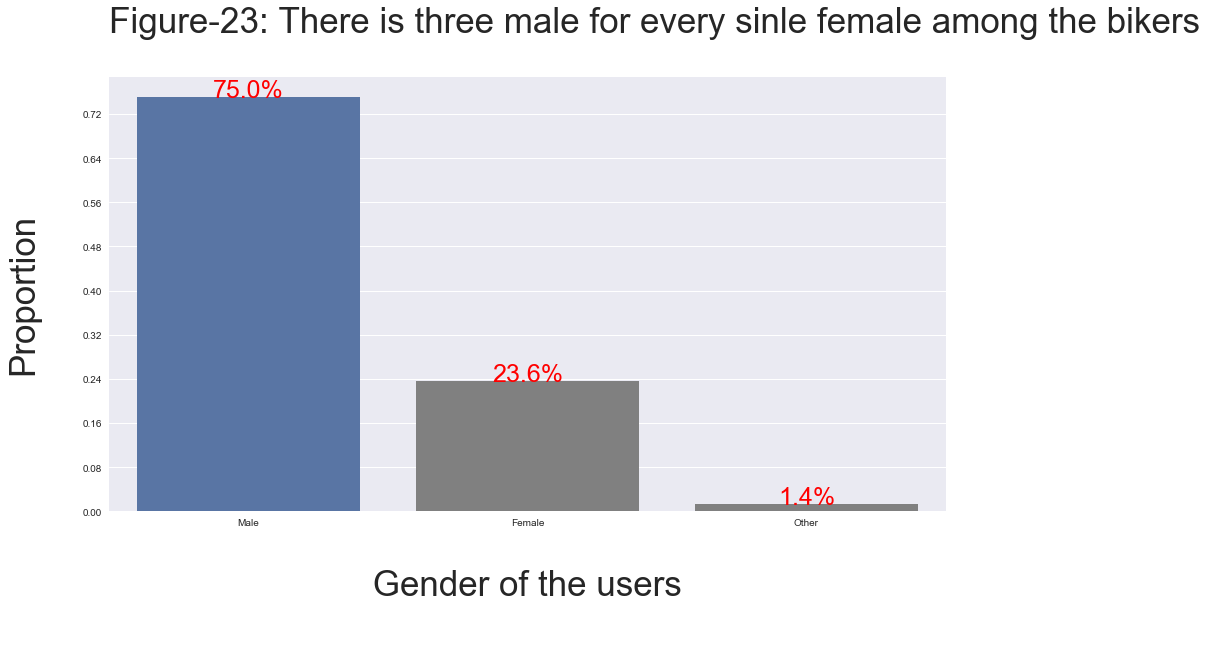

In [96]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [15, 8])
sns.set(style="darkgrid")
base_color = sns.color_palette()[0]
n_points = df_under61['member_gender'].value_counts().sum()
max_count = df_under61['member_gender'].value_counts().max()
max_prop = max_count/ n_points


values = np.array(df_under61['member_gender'].value_counts()/df_under61['member_gender'].value_counts().sum()*100)
clrs = ['grey'if (x < 75) else base_color for x in values]

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61, x = df_under61['member_gender'], palette = clrs, order = df_under61['member_gender'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Gender of the users \n",fontsize=35)
plt.ylabel("Proportion\n",fontsize=35)
plt.title('Figure-23: There is three male for every sinle female among the bikers\n',fontsize=35,loc="left")
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)

# add annotations
cat_counts = df_under61['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=25)
    sns.despine(bottom=True, left=True)

In [97]:
gender_count = df.groupby(['user_type', 'member_gender']).size()
gender_count = gender_count.reset_index(name = 'count')
gender_count = gender_count.pivot(index = 'member_gender', columns = 'user_type', values = 'count')

#Summary of the total the genders per user_type
gender_count

user_type,Customer,Subscriber
member_gender,,
Female,32350,200945
Male,65543,688252
Other,2057,12026


Text(0,1,'Figure-24: Summary of Usertype per Gender \n')

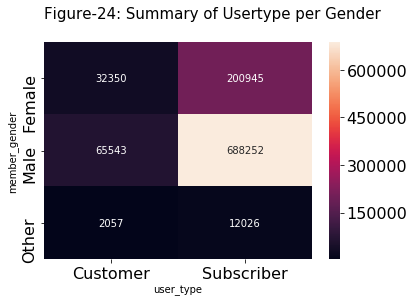

In [18]:
sns.heatmap(gender_count, annot = True, fmt = '0.0f', color =  sns.color_palette('vlag', 9))
plt.title('Figure-24: Summary of Usertype per Gender \n',fontsize=15,loc="left")

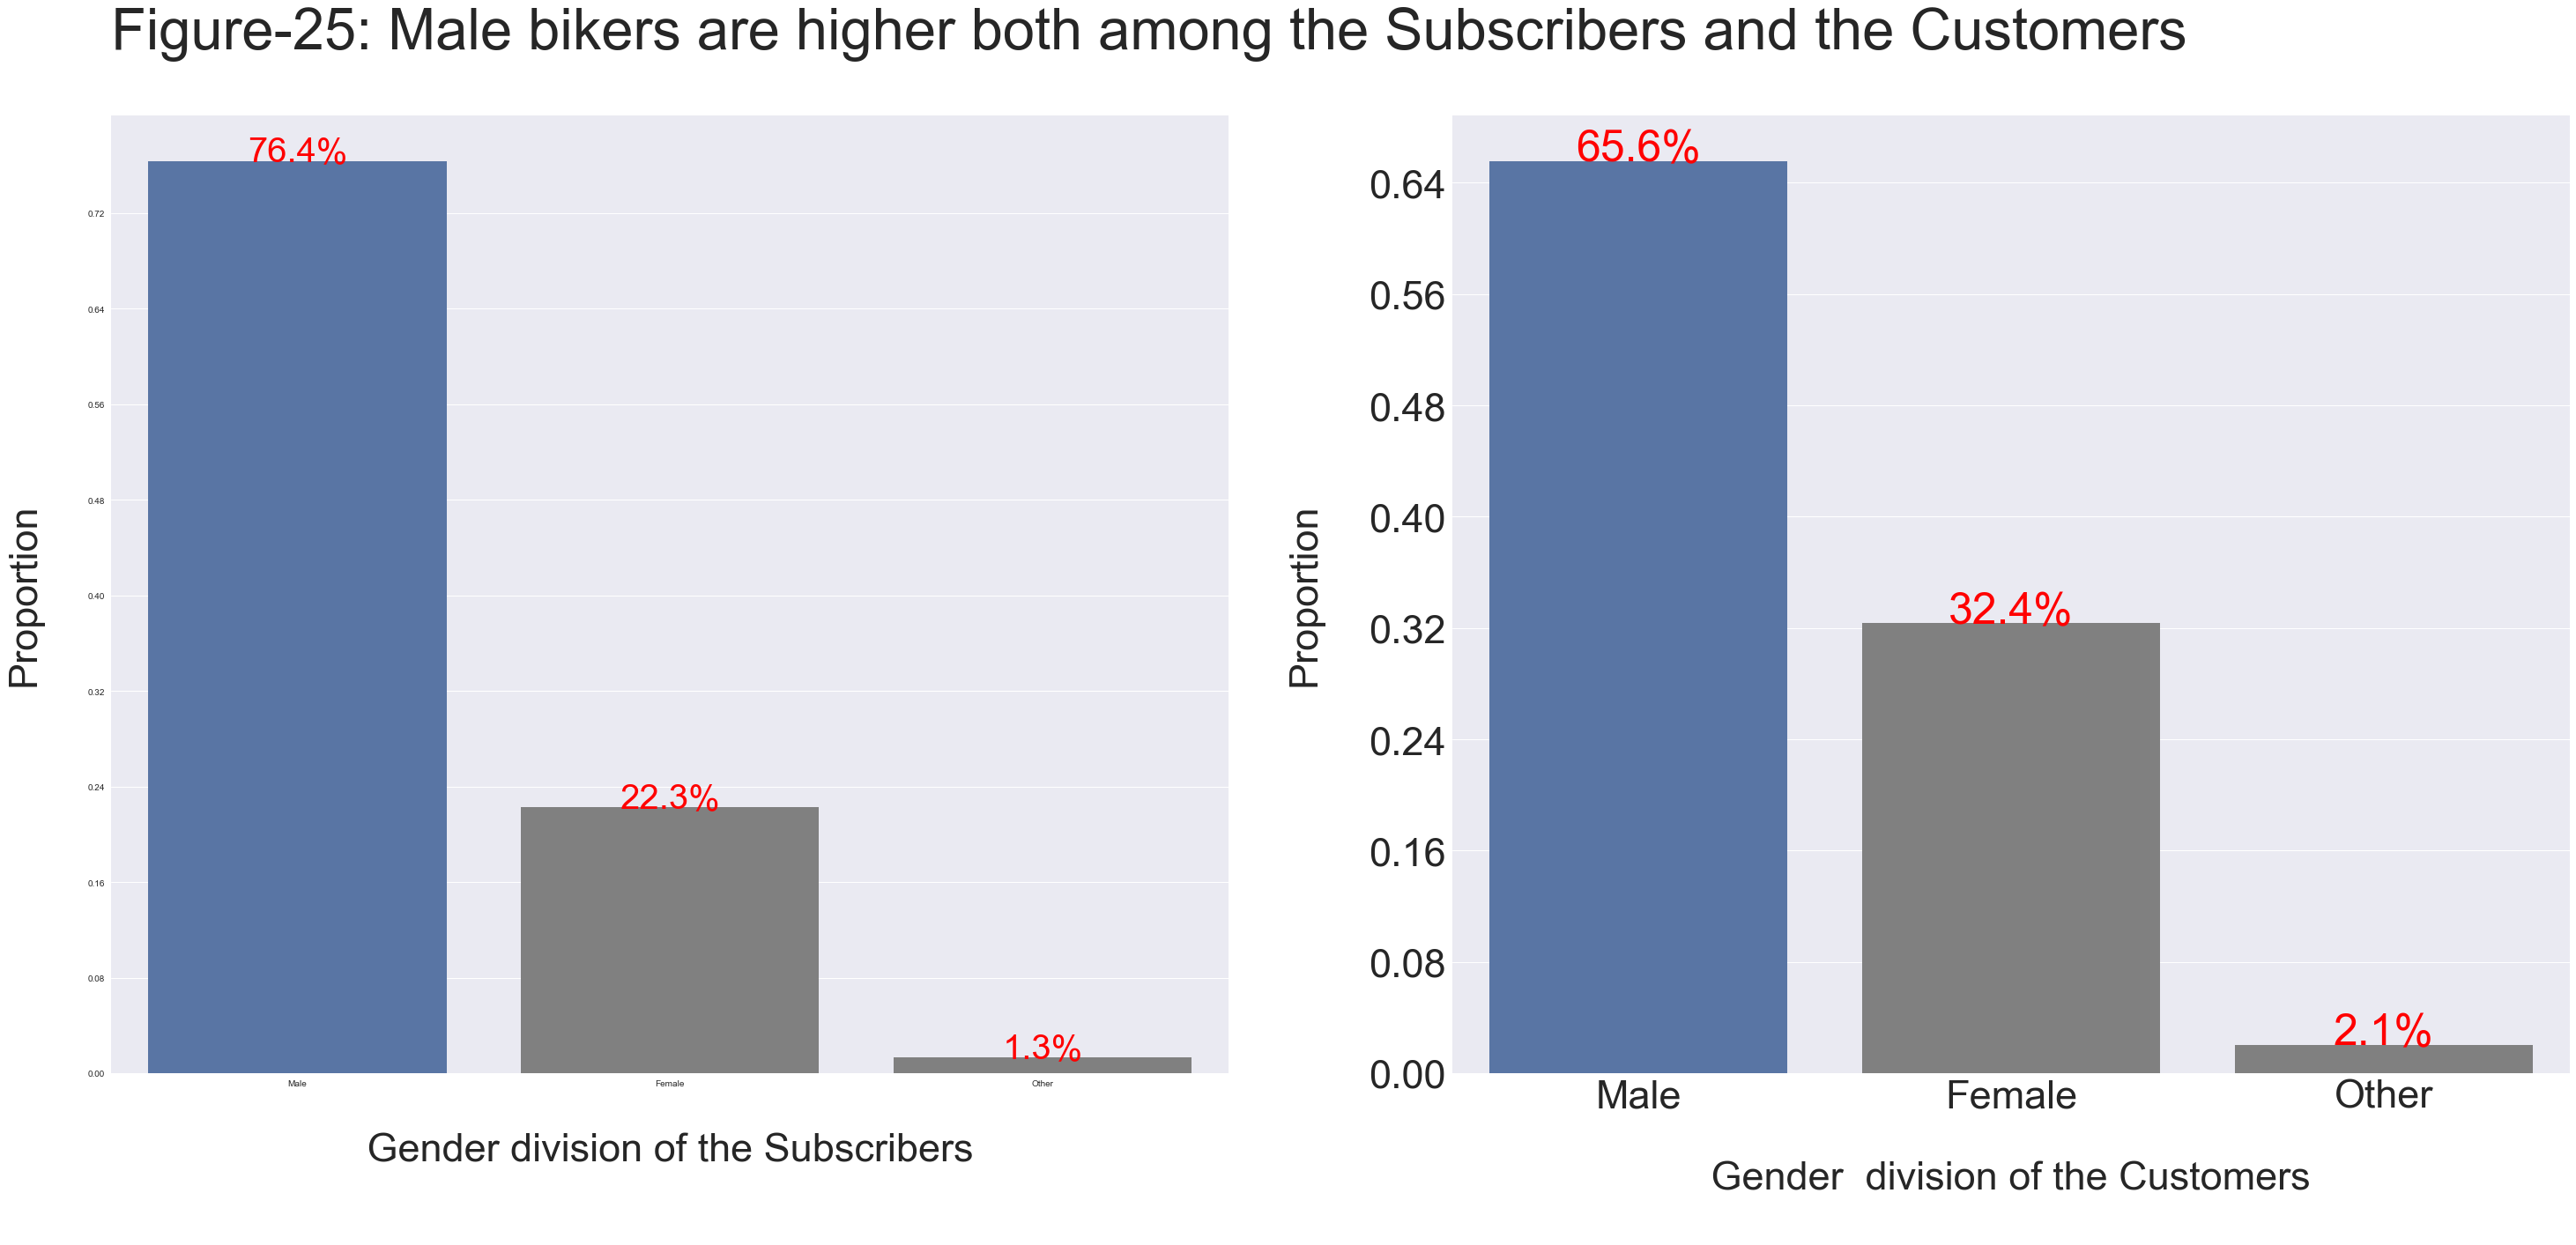

In [84]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [50, 20])
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
n_points = df_subscriber['member_gender'].value_counts().sum()
max_count = df_subscriber['member_gender'].value_counts().max()
max_prop = max_count/ n_points

values = np.array( df_subscriber['member_gender'].value_counts()/ df_subscriber['member_gender'].value_counts().sum()*100)  
clrs = ['grey'if (x < values.max()) else base_color for x in values]

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_subscriber, x = df_subscriber['member_gender'], palette = clrs, order = df_subscriber['member_gender'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Gender division of the Subscribers \n",fontsize=45)
plt.ylabel("Proportion\n",fontsize=45)
plt.title('Figure-25: Male bikers are higher both among the Subscribers and the Customers\n',fontsize=65,loc="left")
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)

# add annotations
cat_counts = df_subscriber['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=40)
    
    
## Plot the percentage of movie released per quarter
plt.subplot(1, 2, 2)
base_color = sns.color_palette()[1]
n_points = df_customer['member_gender'].value_counts().sum()
max_count = df_customer['member_gender'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_customer, x = df_customer['member_gender'], palette = clrs, order = df_customer['member_gender'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Gender  division of the Customers \n",fontsize=45)
plt.ylabel("Proportion\n",fontsize=45)
#plt.title('Figure-26:Female Customer percentage is higher\n',fontsize=45,loc="left")
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)

# add annotations
cat_counts = df_customer['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=50)

In [20]:
df_under61_sub = df_under61.query('user_type == "Subscriber"')
df_under61_cus = df_under61.query('user_type == "Customer"')

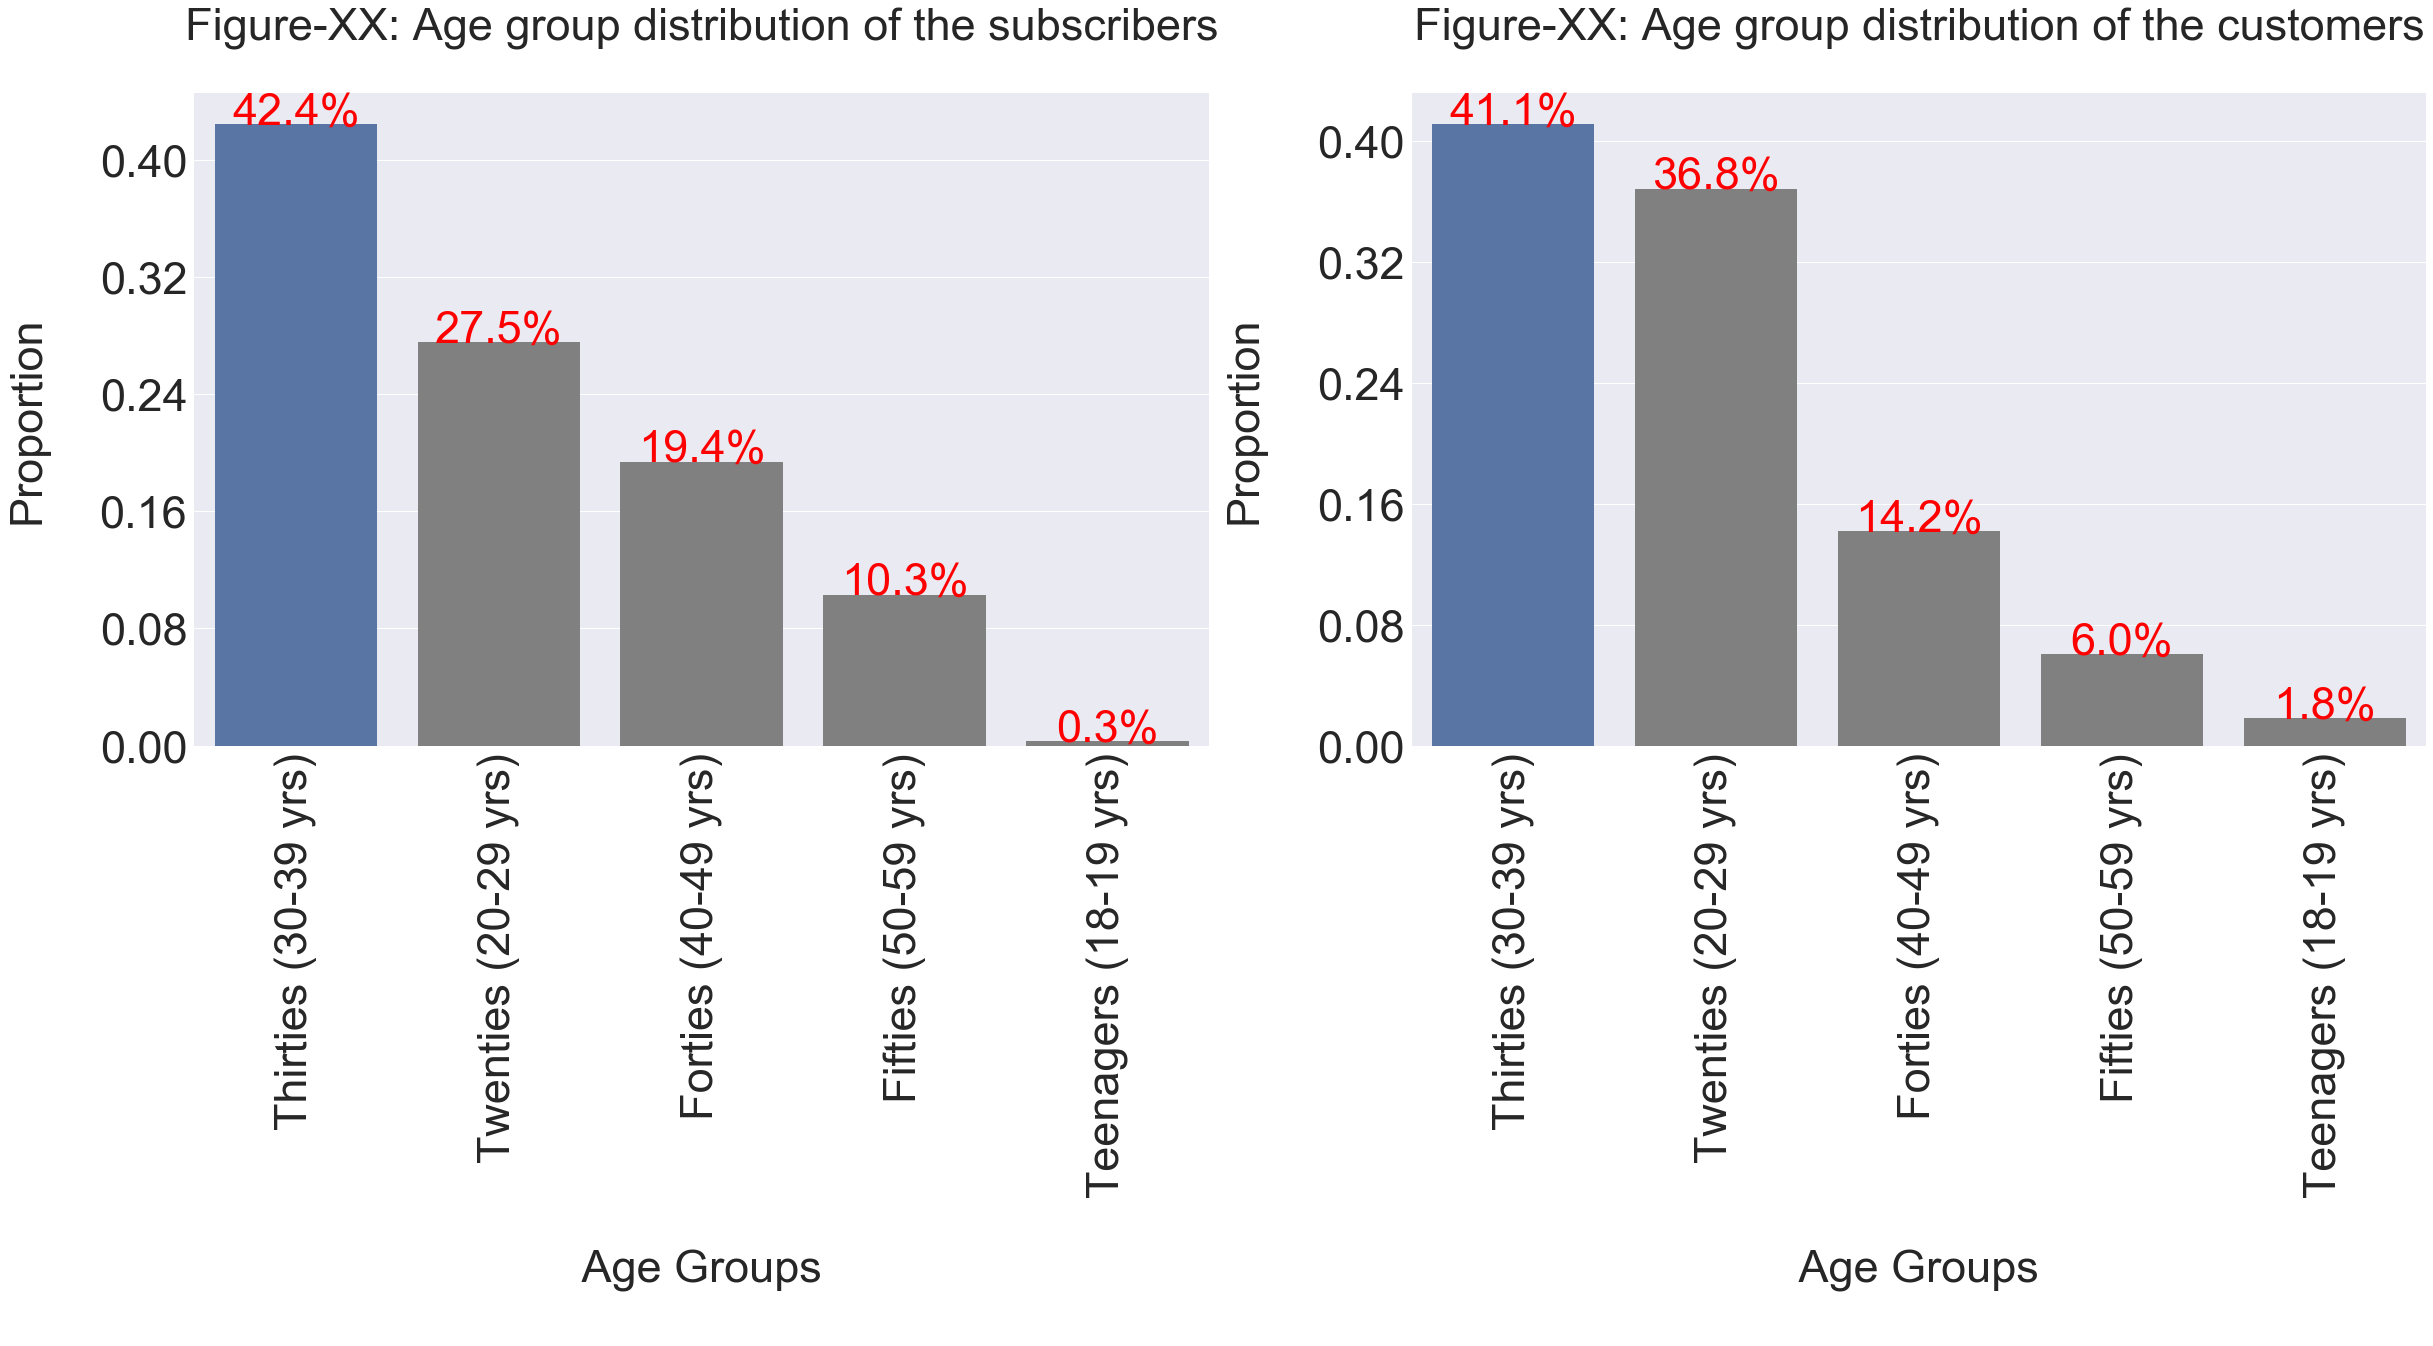

In [114]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [40, 12])
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
base_color = sns.color_palette()[0]
n_points = df_under61_sub['age_cat'].value_counts().sum()
max_count = df_under61_sub['age_cat'].value_counts().max()
max_prop = max_count/ n_points


values = np.array(df_under61_sub['age_cat'].value_counts()/ df_under61_sub['age_cat'].value_counts().sum()*100)  
clrs = ['grey'if (x < values.max()) else base_color for x in values]

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61_sub, x = df_under61_sub['age_cat'], palette= clrs, order = df_under61_sub['age_cat'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Age Groups \n",fontsize=45)
plt.xticks(rotation=90);
plt.ylabel("Proportion\n",fontsize=45)
plt.title('Figure-XX: Age group distribution of the subscribers\n',fontsize=45)
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)

# add annotations
cat_counts = df_under61_sub['age_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=45)
    

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[1]
n_points = df_under61_cus['age_cat'].value_counts().sum()
max_count = df_under61_cus['age_cat'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61_cus, x = df_under61_cus['age_cat'], palette= clrs, order = df_under61_cus['age_cat'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Age Groups \n",fontsize=45)
plt.xticks(rotation=90);
plt.ylabel("Proportion\n",fontsize=45)
plt.title('Figure-XX: Age group distribution of the customers\n',fontsize=45)
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)

# add annotations
cat_counts = df_under61_cus['age_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=45)

### Gender-Distance and Duration

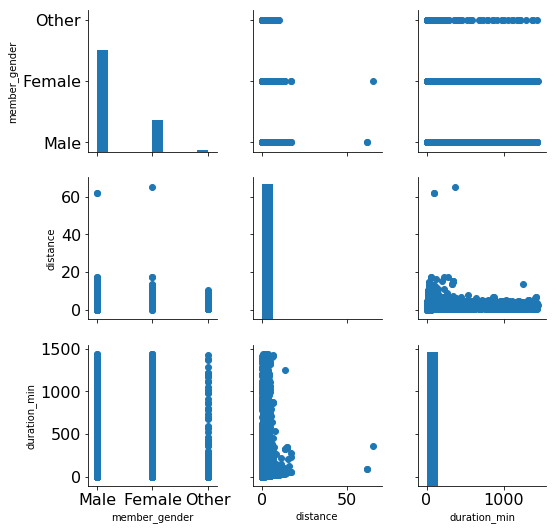

In [22]:
g = sns.PairGrid(data = df, vars = ['member_gender', 'distance', 'duration_min'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

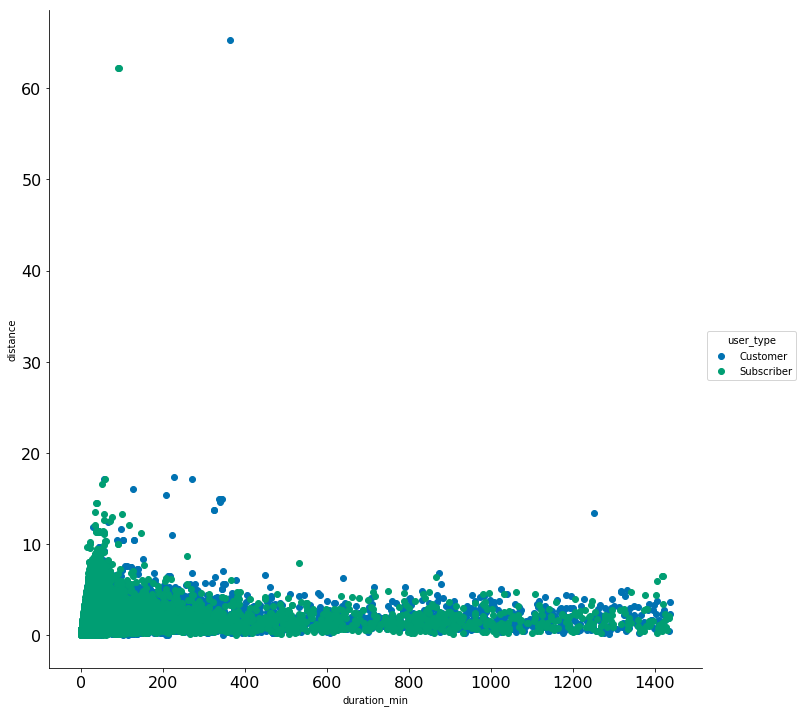

In [23]:
g = sns.FacetGrid(data = df, hue = 'user_type', size = 10,
                 palette = 'colorblind')
g.map(plt.scatter, 'duration_min','distance')
g.add_legend()

In [24]:
# Calculaitng 99% percentile distance
ninetynine_percentile_distance = np.percentile(df_under61.distance, 99.5)
ninetynine_percentile_distance

5.204696707327768

In [25]:
# Calculaitng 99% percentile duration
ninetynine_percentile_duration = np.percentile(df_under61.duration_min, 99)
ninetynine_percentile_duration

51.46666666666667

In [26]:
df_under61_2 = df_under61.query('duration_min < 52 & distance <5.21')

In [27]:
df_under61_2.describe().distance

count    957140.000000
mean          1.611295
std           0.920346
min           0.013307
25%           0.929312
50%           1.406145
75%           2.075480
max           5.209189
Name: distance, dtype: float64

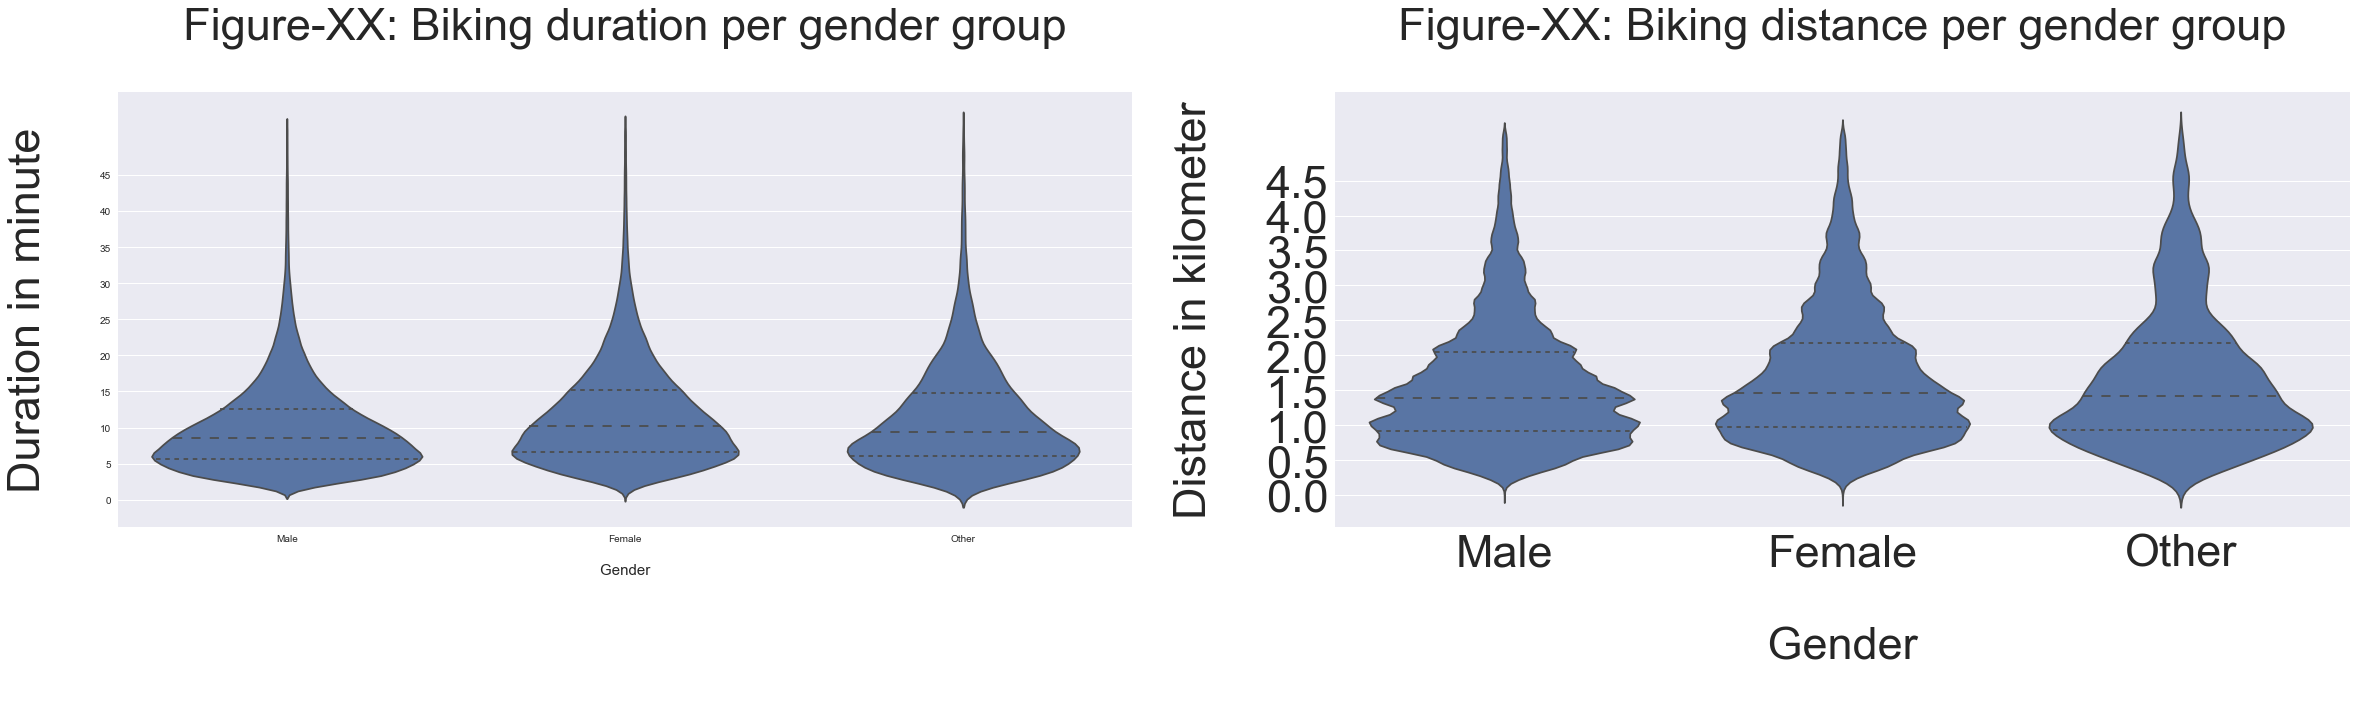

In [117]:
# left plot: violin plot
plt.figure(figsize = [40, 8])
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.violinplot(data = df_under61_2, y = 'duration_min', x = 'member_gender',inner = 'quartile', color = base_color)
plt.xlabel("\n Gender \n",fontsize=15)
plt.ylabel("Duration in minute\n",fontsize=45)
plt.title('Figure-XX: Biking duration per gender group\n',fontsize=45)
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)
plt.yticks(np.arange(0, 50, 5))


# left plot: violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data = df_under61_2, y = 'distance', x = 'member_gender',inner = 'quartile', color = base_color)
plt.xlabel("\n Gender \n",fontsize=45)

plt.ylabel("Distance in kilometer\n",fontsize=45)
plt.title('Figure-XX: Biking distance per gender group\n',fontsize=45)
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)
plt.yticks(np.arange(0, 5, 0.5))
plt.show()

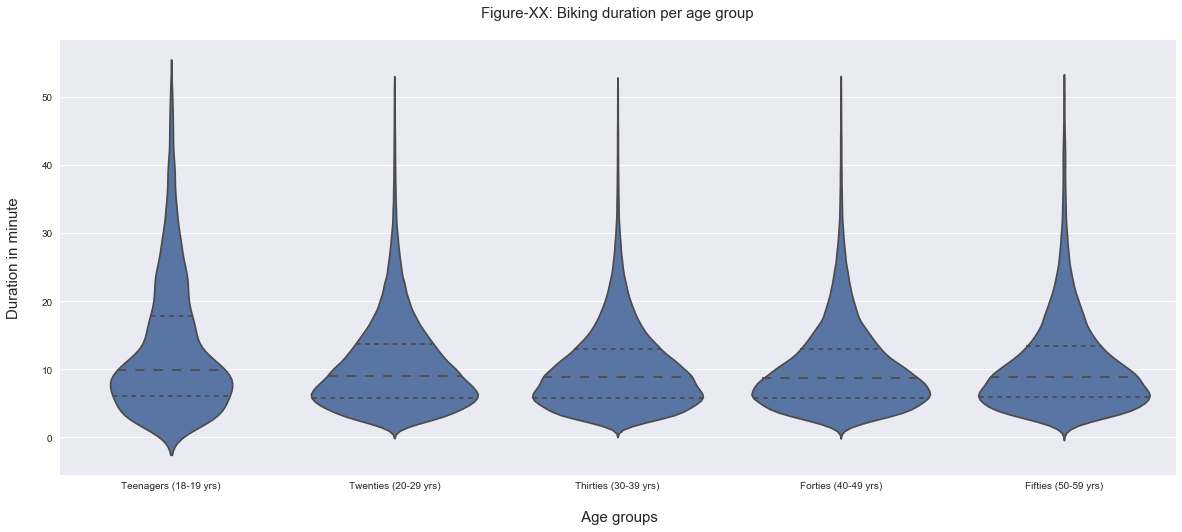

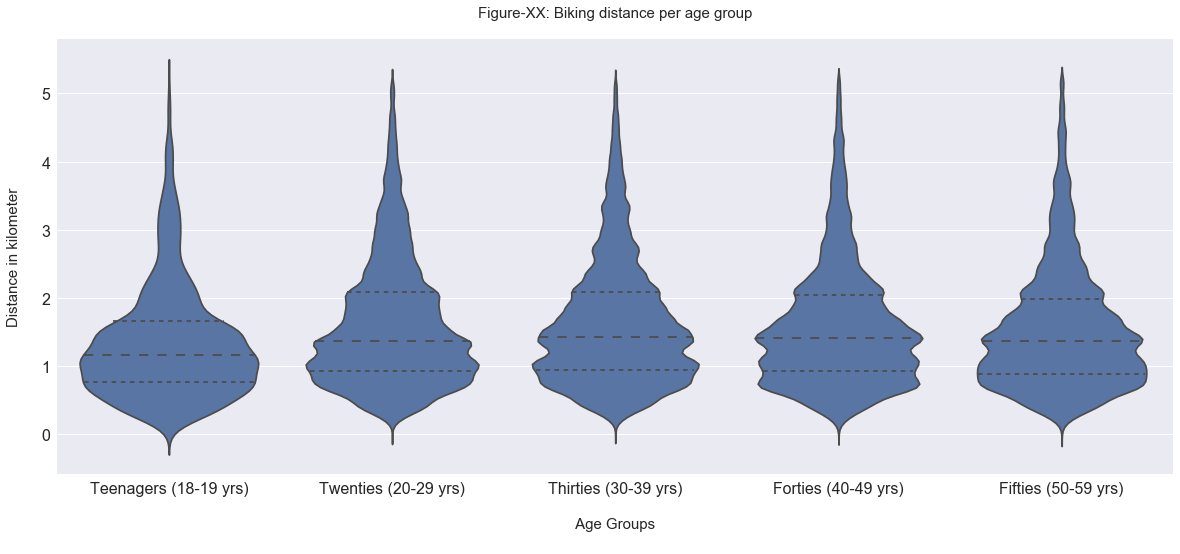

In [104]:
# top plot: violin plot for duration per age group
plt.figure(figsize = [40, 8])
sns.set(style="darkgrid")

sns.violinplot(data = df_under61_2, y = 'duration_min', x = 'age_cat',inner = 'quartile', color = base_color)
plt.xlabel("\n Age groups",fontsize=15)
plt.ylabel("Duration in minute\n",fontsize=45)
plt.title('Figure-XX: Biking duration per age group\n',fontsize=45)
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)



# bottom plot: violin plot-distance per age group
plt.figure(figsize = [20, 8])
sns.violinplot(data = df_under61_2, y = 'distance', x = 'age_cat',inner = 'quartile', color = base_color)
plt.xlabel("\n Age Groups \n",fontsize=15)
plt.ylabel("Distance in kilometer\n",fontsize=15)
plt.title('Figure-XX: Biking distance per age group\n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)


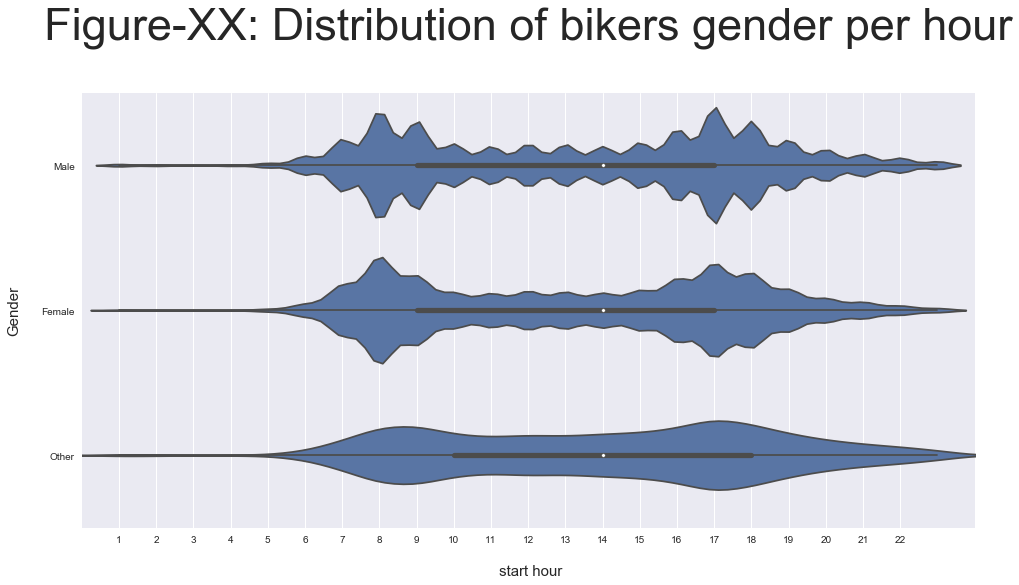

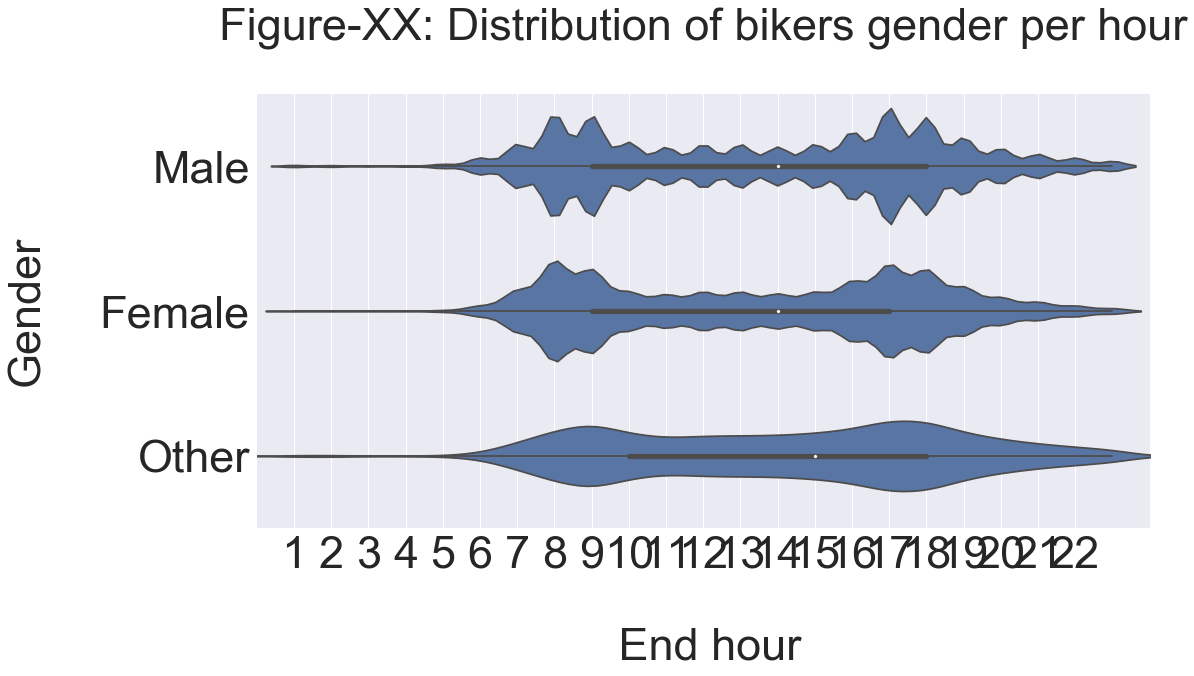

In [118]:
plt.figure(figsize = [16, 8])
sns.set(style="darkgrid")
ax1 = sns.violinplot(data = df_time, x = 'start_hour', y = 'member_gender', color = base_color)
plt.xticks(np.arange(min(df_time['start_hour']), max(df_time['start_hour']), 1.0))
plt.xlim(0, 24)
plt.xlabel("\n start hour",fontsize=15)
plt.ylabel("Gender\n",fontsize=15)
plt.title('Figure-XX: Distribution of bikers gender per hour\n',fontsize=45)
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)

plt.figure(figsize = [16, 8])
ax1 = sns.violinplot(data = df_time, x = 'end_hour', y = 'member_gender', color = base_color)
plt.xticks(np.arange(min(df_time['end_hour']), max(df_time['start_hour']), 1.0))
plt.xlim(0, 24)
plt.xlabel("\n End hour",fontsize=45)
plt.ylabel("Gender\n",fontsize=45)
plt.title('Figure-XX: Distribution of bikers gender per hour\n',fontsize=45)
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=45)